In [1]:
import pandas as pd
import numpy as np
from utils.const import *
from utils.physics import *
import matplotlib.pyplot as plt
from copy import copy

cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
        "pgf.texsystem": "pdflatex",
        "text.usetex": True,            # use LaTeX to write all text
        "font.family": "sans-serif",         
        "font.sans-serif": "Helvetica",
        "font.size": 25,				# default font size
        "axes.labelsize": 24,			# x and y label size
        "axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
        "legend.fontsize": 22,			# legend size
        "xtick.labelsize": 23,			# x axis tick label size
        "ytick.labelsize": 23,			# y axis tick label 
        "figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
        "pgf.preamble": r"\usepackage{xcolor}" ,    # xcolor for colours
        "figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)


In [4]:
inb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-2/2942_CD_0.pkl")
inb = inb.loc[inb.Psector<7, :]

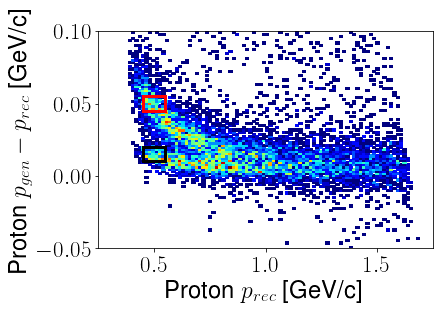

In [62]:
plt.hist2d(inb.Pp, inb.GenPp - inb.Pp, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-.05, .1,101)], cmap =cmap, cmin = 1)
plt.plot(np.linspace(0.45, 0.55, 101), np.linspace(0.01, 0.01, 101), color = 'k', linewidth = 3)
plt.plot(np.linspace(0.45, 0.55, 101), np.linspace(0.02, 0.02, 101), color = 'k', linewidth = 3)
plt.plot(np.linspace(0.45, 0.45, 101), np.linspace(0.01, 0.02, 101), color = 'k', linewidth = 3)
plt.plot(np.linspace(0.55, 0.55, 101), np.linspace(0.01, 0.02, 101), color = 'k', linewidth = 3)

plt.plot(np.linspace(0.45, 0.55, 101), np.linspace(0.045, 0.045, 101), color = 'r', linewidth = 3)
plt.plot(np.linspace(0.45, 0.55, 101), np.linspace(0.055, 0.055, 101), color = 'r', linewidth = 3)
plt.plot(np.linspace(0.45, 0.45, 101), np.linspace(0.045, 0.055, 101), color = 'r', linewidth = 3)
plt.plot(np.linspace(0.55, 0.55, 101), np.linspace(0.045, 0.055, 101), color = 'r', linewidth = 3)

plt.xlabel("Proton "+r"$p_{rec}$"+" ["+GeVc+"]")
plt.ylabel("Proton "+r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.show()

In [5]:
inb = inb.loc[(inb.Pp > 0.45) & (inb.Pp<0.55), :]

<AxesSubplot:>

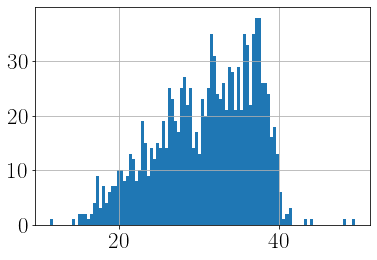

In [7]:
inb.GenPtheta.hist(bins = 101)

In [41]:
inb1 = inb.loc[(inb.GenPp-inb.Pp>0.01)&(inb.GenPp-inb.Pp<0.02), :]
inb2 = inb.loc[(inb.GenPp-inb.Pp>0.045) & (inb.GenPp-inb.Pp<0.055), :]

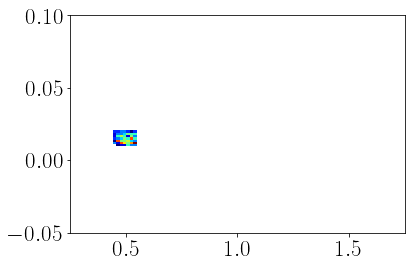

In [32]:
plt.hist2d(inb1.Pp, inb1.GenPp - inb1.Pp, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-.05, .1,101)], cmap =cmap, cmin = 1)
plt.show()

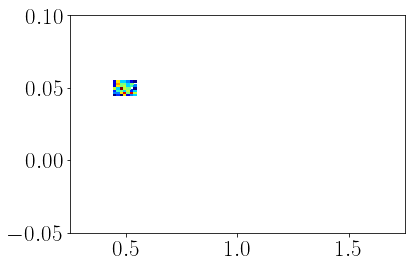

In [33]:
plt.hist2d(inb2.Pp, inb2.GenPp - inb2.Pp, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-.05, .1,101)], cmap =cmap, cmin = 1)
plt.show()

In [48]:
inb1.loc[:, ["GenEpx", "GenEpy", "GenEpz", "GenEp", "GenPpx", "GenPpy", "GenPpz", "GenPp", "Evz", "Ptheta", "GenPtheta"]]

,GenEpx,GenEpy,GenEpz,GenEp,GenPpx,GenPpy,GenPpz,GenPp,Evz,Ptheta,GenPtheta
247,0.5758,0.8977,1.9658,2.236466,-0.1324,0.1550,0.4900,0.530712,-5.755172,22.130037,22.588292
522,-0.7854,-1.0302,4.5134,4.695630,0.1050,-0.1793,0.4940,0.535919,-2.361171,23.840439,22.812205
1571,-0.6425,-0.9386,2.6373,2.872129,0.0578,-0.1721,0.4625,0.496856,-4.435641,23.691582,21.431678
1606,-0.3918,1.1307,2.6702,2.926082,0.0618,0.1387,0.5124,0.534426,-3.402263,16.601887,16.506712
1695,1.3862,0.3857,4.2996,4.533969,-0.1430,-0.0664,0.5222,0.545482,-0.473710,16.990882,16.800262
...,...,...,...,...,...,...,...,...,...,...,...
74363,0.5904,-0.9369,2.9029,3.106957,-0.1361,-0.1887,0.4205,0.480574,5.048139,33.502815,28.955529
74652,-0.9279,0.9997,3.6805,3.925109,0.0819,-0.1666,0.4894,0.523427,-1.814448,24.321388,20.773085
75076,0.5714,-0.9704,7.2672,7.353936,-0.0967,-0.1854,0.4890,0.531832,-5.290843,22.413721,23.152202
75897,-1.2645,-0.2258,7.3211,7.432930,0.0317,0.1541,0.5227,0.545864,-2.313313,18.594770,16.751194


In [50]:
inb2.loc[:, ["GenEpx", "GenEpy", "GenEpz", "GenEp", "GenPpx", "GenPpy", "GenPpz", "GenPp", "Evz", "Ptheta", "GenPtheta"]]

,GenEpx,GenEpy,GenEpz,GenEp,GenPpx,GenPpy,GenPpz,GenPp,Evz,Ptheta,GenPtheta
82,0.9753,1.0480,4.9454,5.148446,-0.0851,-0.2261,0.4912,0.547394,-3.786056,27.350108,26.189147
102,0.8043,-1.0755,4.5379,4.732455,-0.1398,0.2467,0.4230,0.509248,-1.254291,34.931475,33.835884
188,-0.4567,0.9952,4.5814,4.710438,-0.2157,0.2180,0.4422,0.538137,-3.577335,38.164797,34.742255
208,1.0948,0.1193,6.2766,6.372482,0.0870,-0.3655,0.4455,0.582777,-0.995663,42.375220,40.142553
324,0.8659,-0.6449,2.3132,2.552758,-0.2079,-0.2149,0.4648,0.552669,-4.632597,33.679894,32.753166
...,...,...,...,...,...,...,...,...,...,...,...
75980,-0.4276,-0.8689,7.4692,7.531718,0.0912,-0.2892,0.4842,0.571318,-4.444232,31.037768,32.057627
76050,1.2115,-0.1123,5.9070,6.031003,0.1215,0.2345,0.4792,0.547161,-2.266401,30.182257,28.860981
76086,0.5971,1.1076,5.5483,5.689195,0.2673,-0.0361,0.5059,0.573313,-2.869670,29.110089,28.064848
76642,1.3407,0.4354,5.7724,5.942024,-0.1773,-0.1818,0.4712,0.535272,-2.343748,29.692863,28.321387


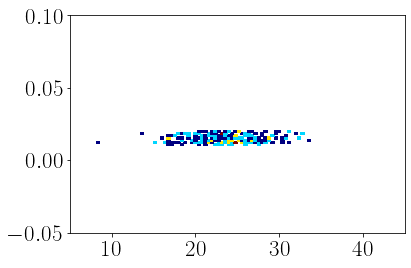

In [39]:
plt.hist2d(inb1.Ptheta, inb1.GenPp - inb1.Pp, bins = [np.linspace(5, 45, 101), np.linspace(-.05, .1,101)], cmap =cmap, cmin = 1)
plt.show()

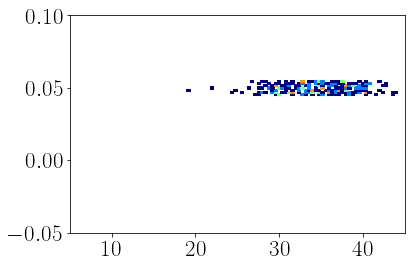

In [40]:
plt.hist2d(inb2.Ptheta, inb2.GenPp - inb2.Pp, bins = [np.linspace(5, 45, 101), np.linspace(-.05, .1,101)], cmap =cmap, cmin = 1)
plt.show()

<AxesSubplot:>

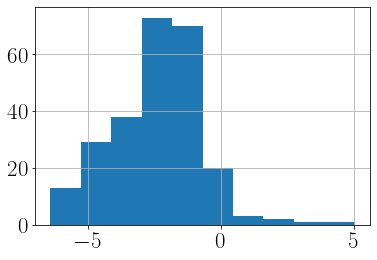

In [51]:
inb1.Evz.hist()

<AxesSubplot:>

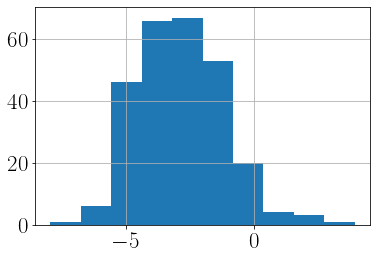

In [52]:
inb2.Evz.hist()

## 6 configurations

In [18]:
rep = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/reproducing.pkl")
rep2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/reproducing2.pkl")
noCD = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/noCD.pkl")
noCD2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/noCD2.pkl")
noTarget = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/noTarget.pkl")
noTarget2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/noTarget2.pkl")

In [42]:
inb1.GenPp - inb1.Pp

247      0.013605
522      0.015555
1571     0.019126
1606     0.015653
1695     0.010374
           ...   
74363    0.013497
74652    0.013054
75076    0.011491
75897    0.013120
76142    0.012779
Length: 250, dtype: float64

In [43]:
inb2.GenPp - inb2.Pp

82       0.045880
102      0.046346
188      0.051121
208      0.051029
324      0.051047
           ...   
75980    0.047022
76050    0.049699
76086    0.047429
76642    0.048163
76713    0.049238
Length: 267, dtype: float64

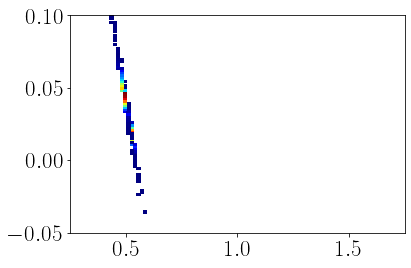

In [10]:
plt.hist2d(rep.Pp, rep.GenPp-rep.Pp, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin =1)
plt.show()

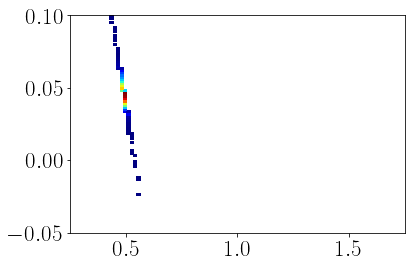

In [11]:
plt.hist2d(rep2.Pp, rep2.GenPp-rep2.Pp, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin =1)
plt.show()

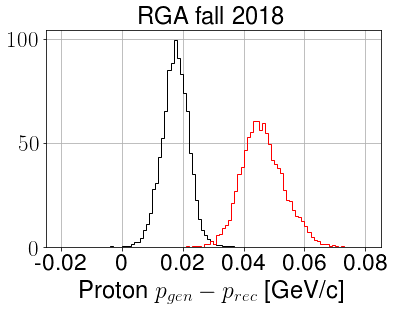

In [80]:
(rep.GenPp-rep.Pp).hist(bins = np.linspace(-0.02, 0.08, 101), histtype = 'step', density=True, color = 'k')
(rep2.GenPp-rep2.Pp).hist(bins = np.linspace(-0.02, 0.08, 101), histtype = 'step', density=True, color = 'r', label = '')
plt.xticks([-0.02, 0, 0.02, 0.04, 0.06, 0.08],[-0.02, 0, 0.02, 0.04, 0.06, 0.08])
plt.title("RGA fall 2018")
plt.xlabel("Proton "+r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.savefig("rgafall2018")

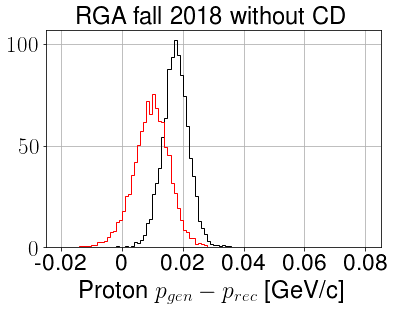

In [81]:
(noCD.GenPp-noCD.Pp).hist(bins = np.linspace(-0.02, 0.08, 101), histtype = 'step', density=True, color = 'k')
(noCD2.GenPp-noCD2.Pp).hist(bins = np.linspace(-0.02, 0.08, 101), histtype = 'step', density=True, color = 'r', label = '')
plt.xticks([-0.02, 0, 0.02, 0.04, 0.06, 0.08],[-0.02, 0, 0.02, 0.04, 0.06, 0.08])
plt.title("RGA fall 2018 without CD")
plt.xlabel("Proton "+r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.savefig("rgafall2018_noCD")

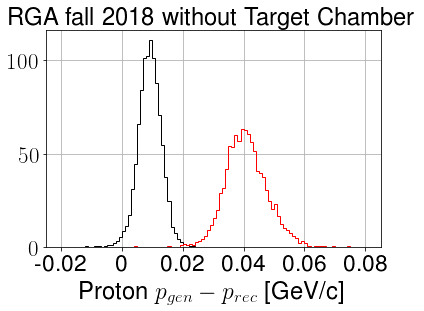

In [82]:
(noTarget.GenPp-noTarget.Pp).hist(bins = np.linspace(-0.02, 0.08, 101), histtype = 'step', density=True, color = 'k')
(noTarget2.GenPp-noTarget2.Pp).hist(bins = np.linspace(-0.02, 0.08, 101), histtype = 'step', density=True, color = 'r', label = '')
plt.xticks([-0.02, 0, 0.02, 0.04, 0.06, 0.08],[-0.02, 0, 0.02, 0.04, 0.06, 0.08])
plt.title("RGA fall 2018 without Target Chamber")
plt.xlabel("Proton "+r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.savefig("rgafall2018_noTarget")

## 2 conf

In [4]:
rep = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/ver2/reproducing.pkl")
noCD = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/ver2/noCD.pkl")

In [16]:
rep

,Epx,Epy,Epz,Evz,Esector,event,Ppx,Ppy,Ppz,Pvz,...,GenEpz,GenEp,GenEtheta,GenEphi,GenPpx,GenPpy,GenPpz,GenPp,GenPtheta,GenPphi
0,1.394679,0.385016,4.314182,-3.134393,1,0,-0.166204,0.055858,0.395653,-6.818264,...,4.2996,4.533969,18.50279,15.548837,-0.2391,0.0628,0.4346,0.499990,29.632140,165.283570
1,1.389312,0.387606,4.314012,-3.086557,1,1,-0.040067,0.199813,0.442955,-4.216737,...,4.2996,4.533969,18.50279,15.548837,-0.0463,0.1977,0.4569,0.499987,23.960660,103.180738
2,1.091339,0.345723,3.420656,-2.903707,1,2,0.173332,0.035914,0.450220,-3.970372,...,4.2996,4.533969,18.50279,15.548837,0.1861,0.0399,0.4624,0.500039,22.372639,12.101065
3,1.384540,0.383222,4.279383,-2.969091,1,3,0.073628,-0.242016,0.358913,-1.542809,...,4.2996,4.533969,18.50279,15.548837,0.1060,-0.2633,0.4116,0.499977,34.589832,-68.071142
4,1.150423,0.361699,3.641849,-0.592287,1,4,-0.164595,-0.182708,0.298680,1.516840,...,4.2996,4.533969,18.50279,15.548837,-0.1421,-0.2579,0.4041,0.500002,36.079819,-118.854271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111552,1.386331,0.385987,4.299901,-2.934180,1,111412,0.200897,-0.108075,0.423885,-2.491780,...,4.2996,4.533969,18.50279,15.548837,0.1989,-0.0837,0.4510,0.499968,25.570096,-22.822063
111553,1.333717,0.392631,4.178991,0.748383,1,111413,-0.224001,0.071581,0.398603,-2.594365,...,4.2996,4.533969,18.50279,15.548837,-0.2346,0.0491,0.4388,0.499993,28.644422,168.179055
111554,1.379959,0.379884,4.272501,-3.354741,1,111414,-0.205263,-0.014879,0.440659,-1.987198,...,4.2996,4.533969,18.50279,15.548837,-0.1985,-0.0145,0.4587,0.500018,23.455914,-175.822087
111555,1.383721,0.379103,4.278121,-3.345309,1,111415,-0.198904,-0.193419,0.342481,-0.774248,...,4.2996,4.533969,18.50279,15.548837,-0.1922,-0.2343,0.3977,0.500003,37.307341,-129.362572


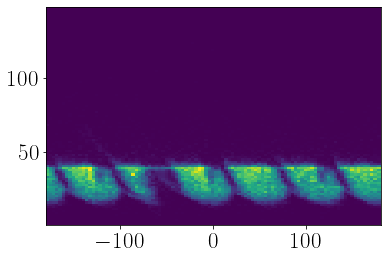

In [14]:
plt.hist2d(rep.Pphi, rep.Ptheta, bins = 101)
plt.show()

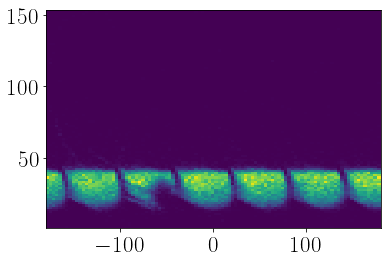

In [15]:
plt.hist2d(noCD.Pphi, noCD.Ptheta, bins = 101)
plt.show()

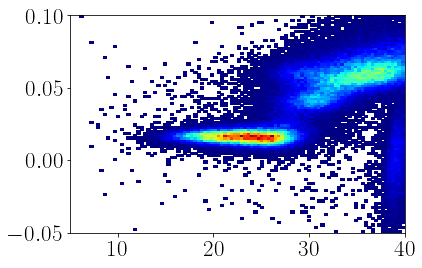

In [9]:
plt.hist2d(rep.Ptheta, rep.GenPp - rep.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.show()

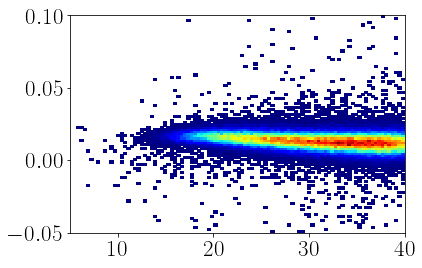

In [10]:
plt.hist2d(noCD.Ptheta, noCD.GenPp - noCD.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.show()

## 6 conf, again

In [4]:
rep = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/ver2/reproducing.pkl")
rep2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/ver2/reproducing2.pkl")
noCD = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/ver2/noCD.pkl")
noCD2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/ver2/noCD2.pkl")
noCVT = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/ver2/noCVT.pkl")
noSVT = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/ver2/noSVT.pkl")
noBMT = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/ver2/noBMT.pkl")
noCTOF = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/ver2/noCTOF.pkl")
noCND = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/protonStudies/ver2/noCND.pkl")

<AxesSubplot:>

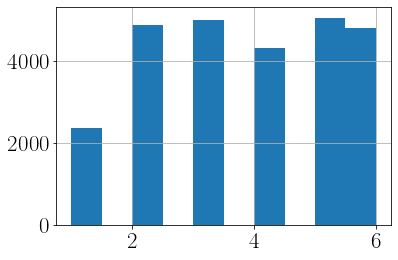

In [15]:
rep2.Psector.hist()

In [5]:
rep.loc[:, ["GenEpx", "GenEpy", "GenEpz"]]

,GenEpx,GenEpy,GenEpz
0,1.3862,0.3857,4.2996
1,1.3862,0.3857,4.2996
2,1.3862,0.3857,4.2996
3,1.3862,0.3857,4.2996
4,1.3862,0.3857,4.2996
...,...,...,...
111552,1.3862,0.3857,4.2996
111553,1.3862,0.3857,4.2996
111554,1.3862,0.3857,4.2996
111555,1.3862,0.3857,4.2996


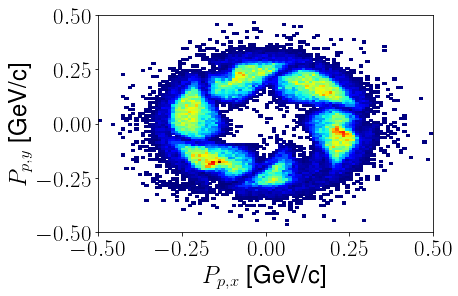

In [6]:
plt.hist2d(rep.Ppx, rep.Ppy, bins = [np.linspace(-0.5, 0.5, 101), np.linspace(-0.5, 0.5, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$P_{p, x}$"+" ["+GeVc+"]")
plt.ylabel(r"$P_{p, y}$"+" ["+GeVc+"]")
plt.show()

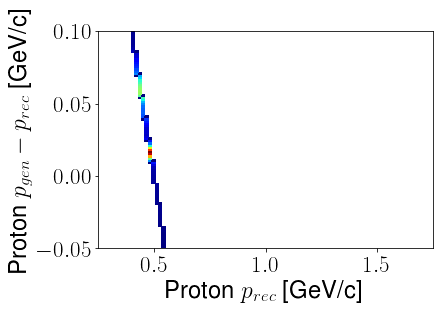

In [8]:
plt.hist2d(rep.Pp, rep.GenPp - rep.Pp, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-.05, .1,101)], cmap =cmap, cmin = 1)
# plt.plot(np.linspace(0.45, 0.55, 101), np.linspace(0.01, 0.01, 101), color = 'k', linewidth = 3)
# plt.plot(np.linspace(0.45, 0.55, 101), np.linspace(0.02, 0.02, 101), color = 'k', linewidth = 3)
# plt.plot(np.linspace(0.45, 0.45, 101), np.linspace(0.01, 0.02, 101), color = 'k', linewidth = 3)
# plt.plot(np.linspace(0.55, 0.55, 101), np.linspace(0.01, 0.02, 101), color = 'k', linewidth = 3)

# plt.plot(np.linspace(0.45, 0.55, 101), np.linspace(0.045, 0.045, 101), color = 'r', linewidth = 3)
# plt.plot(np.linspace(0.45, 0.55, 101), np.linspace(0.055, 0.055, 101), color = 'r', linewidth = 3)
# plt.plot(np.linspace(0.45, 0.45, 101), np.linspace(0.045, 0.055, 101), color = 'r', linewidth = 3)
# plt.plot(np.linspace(0.55, 0.55, 101), np.linspace(0.045, 0.055, 101), color = 'r', linewidth = 3)

plt.xlabel("Proton "+r"$p_{rec}$"+" ["+GeVc+"]")
plt.ylabel("Proton "+r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.show()

In [7]:
rep = rep.loc[(rep.Psector<7), :]

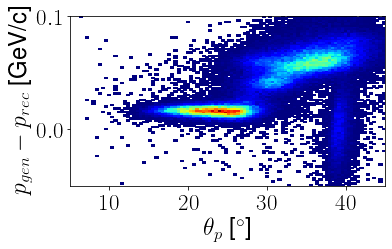

In [25]:
plt.hist2d(rep.Ptheta, rep.GenPp - rep.Pp, bins = [np.linspace(5, 45,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.savefig("proton_reference.pdf")

<AxesSubplot:>

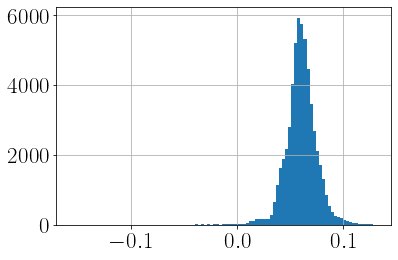

In [16]:
(rep.GenPp - rep.Pp).hist(bins = 101)

In [17]:
(rep.GenPp - rep.Pp).mean()

0.060338143983754734

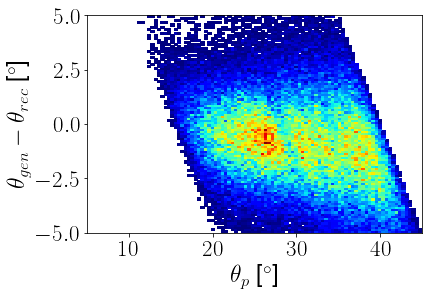

In [34]:
plt.hist2d(rep.Ptheta, rep.GenPtheta - rep.Ptheta, bins = [np.linspace(5, 45,101), np.linspace(-5, 5, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$\theta_{gen}-\theta_{rec}$"+" ["+degree+"]")
plt.show()

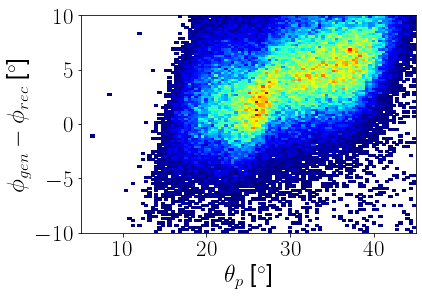

In [33]:
plt.hist2d(rep.Ptheta, rep.GenPphi - rep.Pphi, bins = [np.linspace(5, 45,101), np.linspace(-10, 10, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$\phi_{gen}-\phi_{rec}$"+" ["+degree+"]")
plt.show()

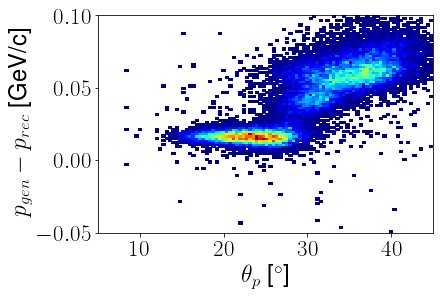

In [27]:
plt.hist2d(rep2.Ptheta, rep2.GenPp - rep2.Pp, bins = [np.linspace(5, 45,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.show()

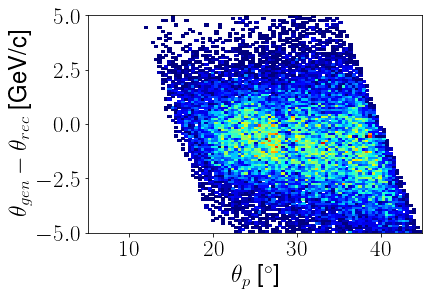

In [28]:
plt.hist2d(rep2.Ptheta, rep2.GenPtheta - rep2.Ptheta, bins = [np.linspace(5, 45,101), np.linspace(-5, 5, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$\theta_{gen}-\theta_{rec}$"+" ["+GeVc+"]")
plt.show()

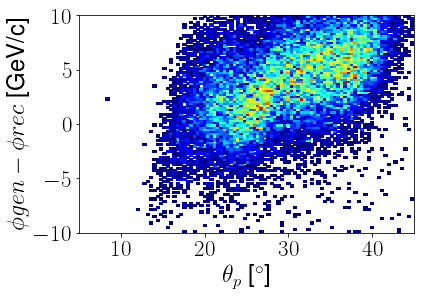

In [29]:
plt.hist2d(rep2.Ptheta, rep2.GenPphi - rep2.Pphi, bins = [np.linspace(5, 45,101), np.linspace(-10, 10, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$\phi{gen}-\phi{rec}$"+" ["+GeVc+"]")
plt.show()

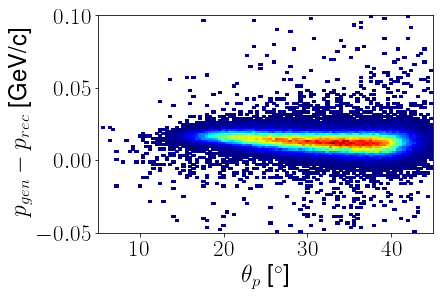

In [30]:
plt.hist2d(noCD.Ptheta, noCD.GenPp - noCD.Pp, bins = [np.linspace(5, 45,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.show()

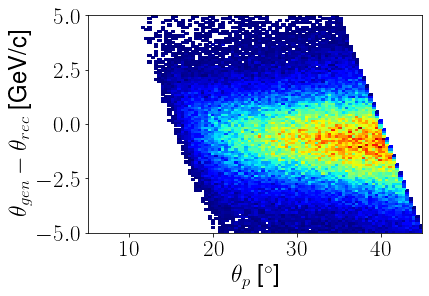

In [31]:
plt.hist2d(noCD.Ptheta, noCD.GenPtheta - noCD.Ptheta, bins = [np.linspace(5, 45,101), np.linspace(-5, 5, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$\theta_{gen}-\theta_{rec}$"+" ["+degree+"]")
plt.show()

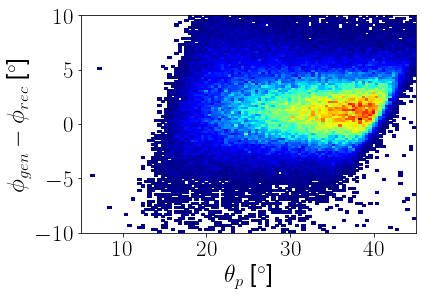

In [35]:
plt.hist2d(noCD.Ptheta, noCD.GenPphi - noCD.Pphi, bins = [np.linspace(5, 45,101), np.linspace(-10, 10, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$\phi_{gen}-\phi_{rec}$"+" ["+degree+"]")
plt.show()

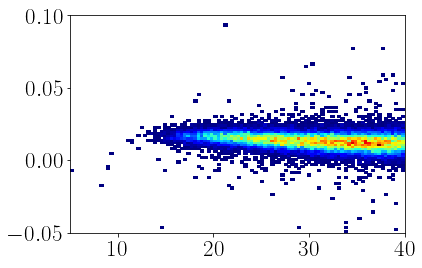

In [7]:
plt.hist2d(noCD2.Ptheta, noCD2.GenPp - noCD2.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.show()

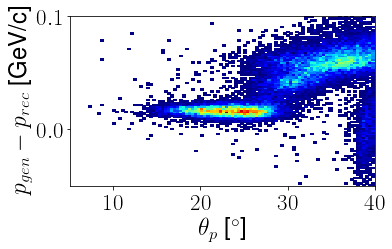

In [26]:
plt.hist2d(noCND.Ptheta, noCND.GenPp - noCND.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.savefig("proton_noCND.pdf")

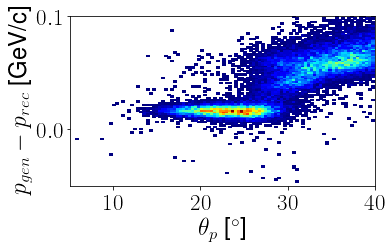

In [27]:
plt.hist2d(noCTOF.Ptheta, noCTOF.GenPp - noCTOF.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.savefig("proton_noCTOF.pdf")

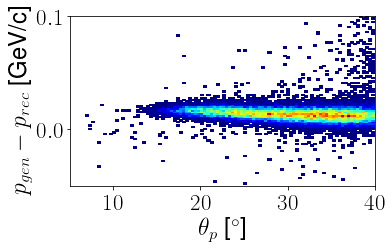

In [28]:
plt.hist2d(noCVT.Ptheta, noCVT.GenPp - noCVT.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.savefig("proton_noCVT.pdf")

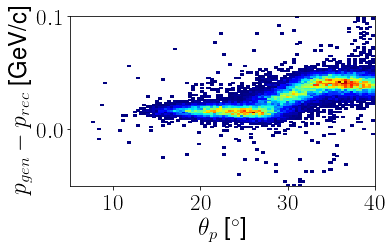

In [35]:
plt.hist2d(noBMT.Ptheta, noBMT.GenPp - noBMT.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.savefig("proton_noBMT.pdf")

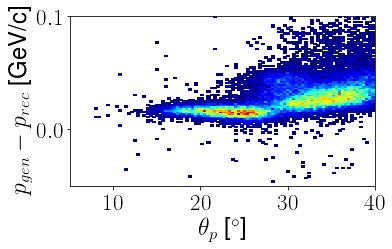

In [36]:
# noSVT_original = copy(noSVT)
# noSVT = noSVT_original.loc[noSVT_original.Psector == 6, :]
plt.hist2d(noSVT.Ptheta, noSVT.GenPp - noSVT.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.ylabel(r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
plt.savefig("proton_noSVT.pdf")

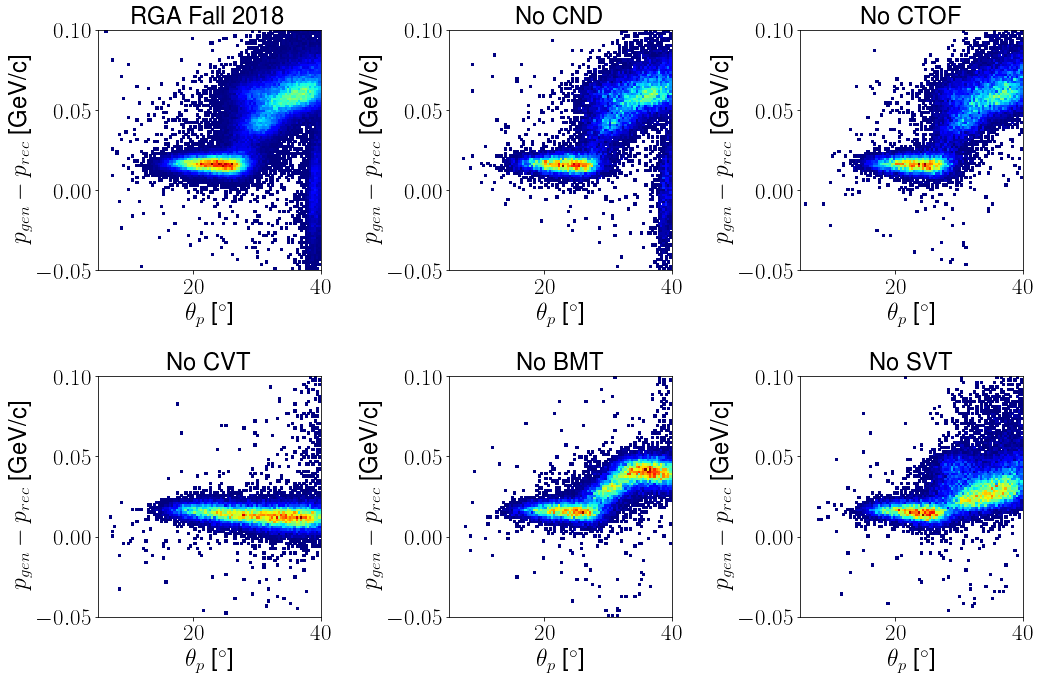

In [11]:
fig, axs = plt.subplots(2,3, figsize = (15, 10))
for row in range(2):
    for col in range(3):
#         ind =col+2*row
        axs[row, col].set_xlabel(r"$\theta_{p}$"+" ["+degree+"]")
        axs[row, col].set_ylabel(r"$p_{gen}-p_{rec}$"+" ["+GeVc+"]")
axs[0, 0].hist2d(rep.Ptheta, rep.GenPp - rep.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[0, 1].hist2d(noCND.Ptheta, noCND.GenPp - noCND.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[0, 2].hist2d(noCTOF.Ptheta, noCTOF.GenPp - noCTOF.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 0].hist2d(noCVT.Ptheta, noCVT.GenPp - noCVT.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 1].hist2d(noBMT.Ptheta, noBMT.GenPp - noBMT.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 2].hist2d(noSVT.Ptheta, noSVT.GenPp - noSVT.Pp, bins = [np.linspace(5, 40,101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)

axs[0, 0].set_title("RGA Fall 2018")
axs[0, 1].set_title("No CND")
axs[0, 2].set_title("No CTOF")
axs[1, 0].set_title("No CVT")
axs[1, 1].set_title("No BMT")
axs[1, 2].set_title("No SVT")

plt.tight_layout()
plt.savefig("protons_500MeV.pdf")